<a href="https://colab.research.google.com/github/firouzdimas/Data-Analyst-Data-Science-Mini-Portofolio/blob/main/Finpro_Dimas_Sadewo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Prediction

## Background & Objective
### Background
Medical insurance is a type of insurance that covers the whole or a part of the risk of a person incurring medical expenses. As with other types of insurance, risk is shared among many individuals. By estimating the overall risk of health risk and health system expenses over the risk pool, an insurer can develop a routine finance structure, such as a monthly premium or payroll tax, to provide the money to pay for the health care benefits specified in the insurance agreement. 
A health insurance company can only make money if it collects more than it spends on the medical care of its beneficiaries. On the other hand, even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients.
### Objective
- To determine the most appropriate model to predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc.
-  Determine what the most important variable influencing insurance costs is.

### Data Understanding

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
407,47,female,23.600,1,no,southwest,8539.67100
1175,22,female,27.100,0,no,southwest,2154.36100
824,60,male,24.320,0,no,northwest,12523.60480
735,49,female,34.770,1,no,northwest,9583.89330
773,19,female,28.880,0,yes,northwest,17748.50620
830,63,male,33.100,0,no,southwest,13393.75600
262,52,male,24.320,3,yes,northeast,24869.83680
793,53,male,20.900,0,yes,southeast,21195.81800
692,20,male,32.395,1,no,northwest,2362.22905
169,27,male,18.905,3,no,northeast,4827.90495


Description
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance for a calender year

#### Data Cleaning

##### Checking Missing and Duplicate Values

In [ ]:
# Checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

In [ ]:
# Checking duplicated values
df.duplicated().sum()

1

There is one duplicated values and we can drop this duplicated row.

In [ ]:
# drop duplicated rows
df = df.drop_duplicates()
# sanity check
df.duplicated().sum()

0

Now we didn't have duplicate value

### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observation:
- Average age of the primary beneficiary is 39.2 and maximum age is 64.
- Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
- Average medical costs billed to health insurance is 13279, median is 9386 and maximum is 63770
- Median is less than mean in charges , indicating distrubution is postively skewed .
- Customer on an average has 1 child.
- For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

##### Numerical Features

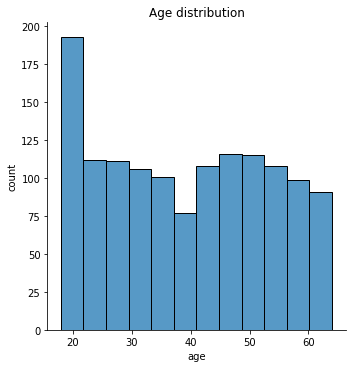

In [ ]:
#Checking Distribution plot for column age
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('count')
plt.xlabel('age')
plt.show()

customers of age 20 showing highest contribution in comarision with higher ages shows slighly less contribution also data is quite uniformely distributed over ages.

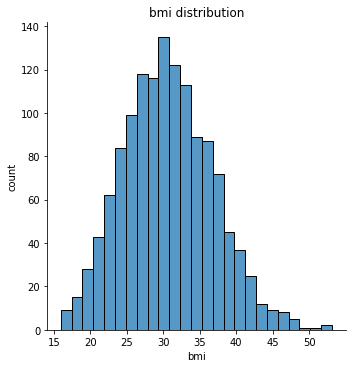

In [ ]:
#Checking Distribution plot for column bmi
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('count')
plt.xlabel('bmi')
plt.show()

bmi is normally distribued.

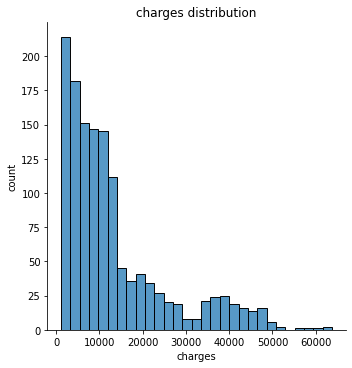

In [ ]:
#Checking Distribution plot for column charges
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('count')
plt.xlabel('charges')
plt.show()

The distribution is right-skewed with a long tail to the right. There’s a bump at around $40,000, perhaps another hidden distribution.

##### Categorical Features

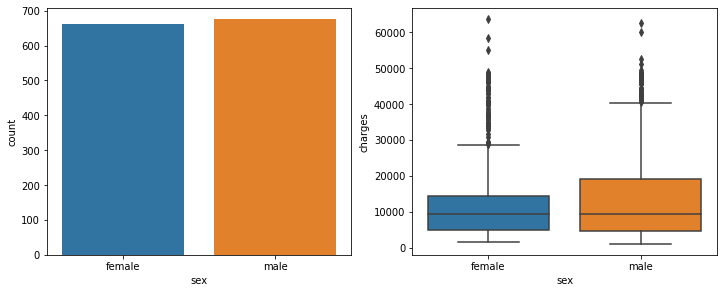

In [ ]:
#sex

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.countplot(df['sex'])

plt.subplot(2,2,2)
sns.boxplot(x='sex', y='charges', data= df)

sex don’t have noticeable differences for each category in terms of charges given.

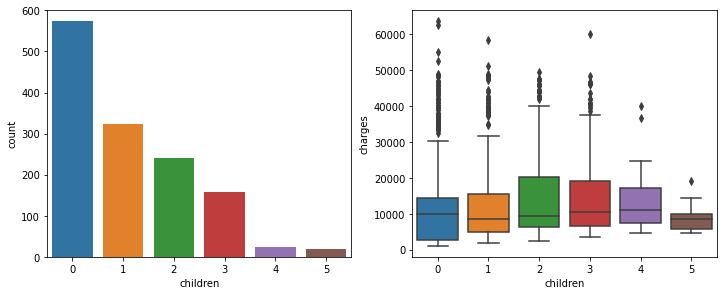

In [ ]:
#children

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.countplot(df['children'])

plt.subplot(2,2,2)
sns.boxplot(x='children', y='charges', data= df)

We can see that there is an increasing trend in charges as the children increases.

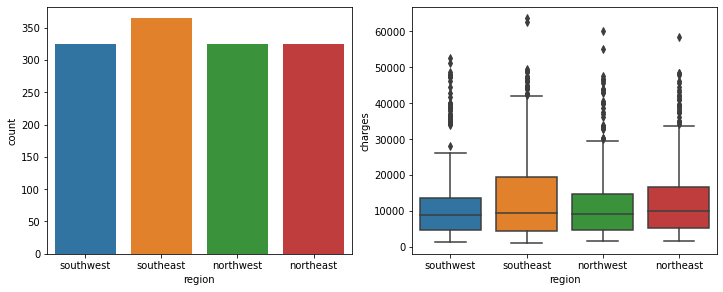

In [ ]:
#region

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.countplot(df['region'])

plt.subplot(2,2,2)
sns.boxplot(x='region', y='charges', data= df)

There is no significant impact of region on charges attribute, it is evenly distributed

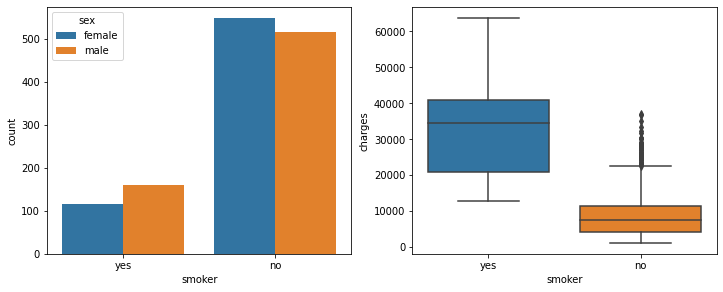

In [ ]:
#smoker

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.countplot(df['smoker'],hue = df['sex'])

plt.subplot(2,2,2)
sns.boxplot(x='smoker', y='charges', data= df)

smoker seems to make a significant difference to charges given by health insurance.

Because smokers definitely have more charges than non-smokers. we will analyze the medical charges by age, bmi and children according to the smoker factor.

##### More than one features

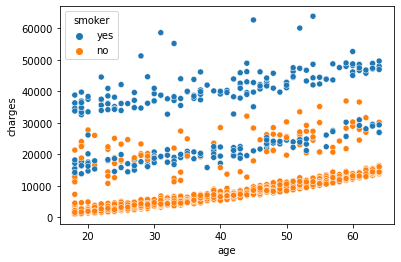

In [ ]:
# Charges and age
sns.scatterplot(x='age', y='charges', hue="smoker", data=df)

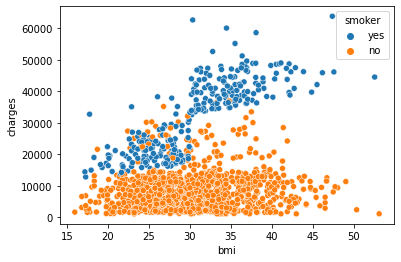

In [ ]:
# Charges and bmi
sns.scatterplot(x='bmi', y='charges', hue="smoker", data=df)

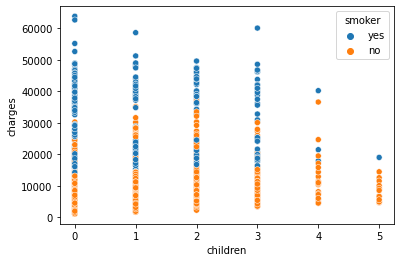

In [ ]:
# Charges and children
sns.scatterplot(x='children', y='charges', hue="smoker", data=df)

smoker seems to have the highest impact on medical charges, even though the charges are growing with age, bmi, and children. Also, people who have more children generally smoke less.

#### Encode

##### Label Encoding

In [ ]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [ ]:
label_encoding('smoker')
label_encoding('sex')

##### One Hot Encoding

In [ ]:
df =pd.get_dummies(data=df,columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


now all category features are encoded. now let's see the correlation between features

##### Correlation

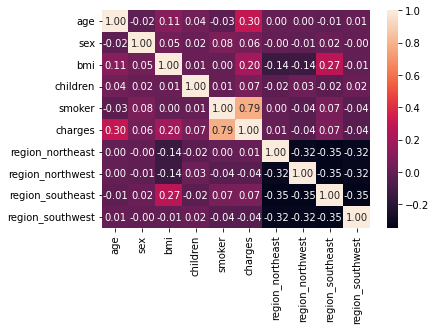

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

As we can see, smoker has a high correlation compared to other features

## Modelling

Train and  Test Split

In [ ]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

We divide train and test in 75:25

#### Scalling Data

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

### Linear Regression

In [ ]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_linreg= metrics.mean_absolute_error(y_test, y_pred)
MSE_linreg = metrics.mean_squared_error(y_test, y_pred)
RMSE_linreg =np.sqrt(MSE_linreg)
pd.DataFrame([MAE_linreg, MSE_linreg, RMSE_linreg], index=['MAE_linreg', 'MSE_linreg', 'RMSE_linreg'], columns=['Metrics'])

,Metrics
MAE_linreg,4.069039e+03
MSE_linreg,3.528392e+07
RMSE_linreg,5.940027e+03


In [ ]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.8387175  0.87219033 0.84020719 0.84997814 0.8562711 ]


In [ ]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7959403124253075

### XGBoost Regressor

In [ ]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,2.552820e+03
MSE_XGB,1.945883e+07
RMSE_XGB,4.411216e+03


In [ ]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.90695144 0.92137294 0.91881022 0.91617358 0.91957468]


In [ ]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.8874625580399547

### Random Forest Regressor

In [ ]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.576532e+03
MSE_forest_reg,2.211980e+07
RMSE_forest_reg,4.703169e+03


In [ ]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.90420681 0.90871542 0.90036462 0.90825436 0.90774568]


In [ ]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8720732048497581

## Conclussion

- In general, smokers spend more on medical cost than non-smokers. As smokers get older, have children, and gain weight, their medical costs increase even more.
- The medical insurance company should focus more on promoting its insurance services to non-smokers, as they are the ones who are more likely to be pressured by medical bills, which is where the company's services come in handy
- The best model of the three models that have been tested to predict the charges to be paid is Random Forest Regressor
- By being able to predict costs well we can determine the best price that competes with other companies but makes our company more profitable